<a href="https://colab.research.google.com/github/Drowser2430/Drowser2430/blob/main/Drowser_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train_data.csv to train_data.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('train_data.csv')


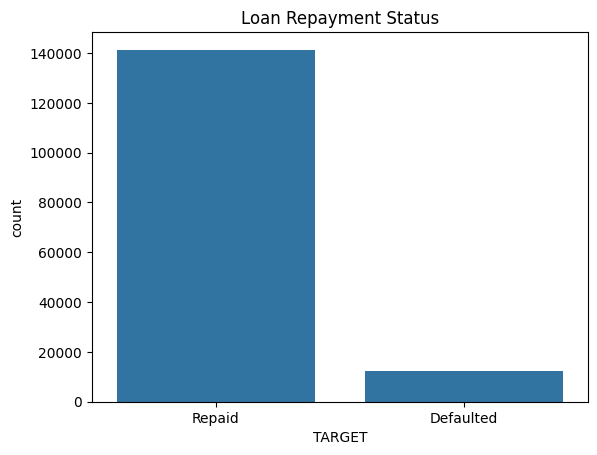

TARGET
0    0.919274
1    0.080726
Name: proportion, dtype: float64


In [5]:
# View distribution of the target variable
sns.countplot(data=df, x='TARGET')
plt.title('Loan Repayment Status')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.show()

# Print some basic stats
print(df['TARGET'].value_counts(normalize=True))


 Target Variable Analysis

The target variable, `TARGET`, represents whether a loan applicant experienced payment difficulties:

- `0`: The client repaid the loan on time.
- `1`: The client defaulted on the loan.

Understanding this distribution is crucial before building any predictive model. The visualization below shows a clear class imbalance, with the vast majority of applicants repaying their loans.

This imbalance means that our model could easily be biased toward predicting "repaid" (class 0) unless we address it through techniques such as resampling (oversampling class 1 or undersampling class 0), applying class weights, or using specialized algorithms.

The printed value counts further confirm the imbalance, showing the percentage of clients who defaulted versus those who repaid.


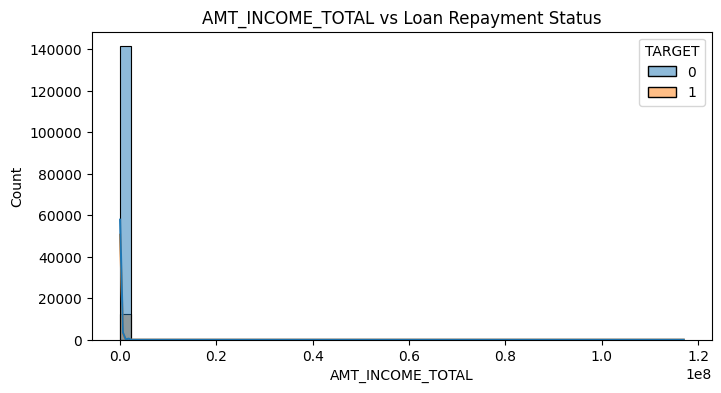

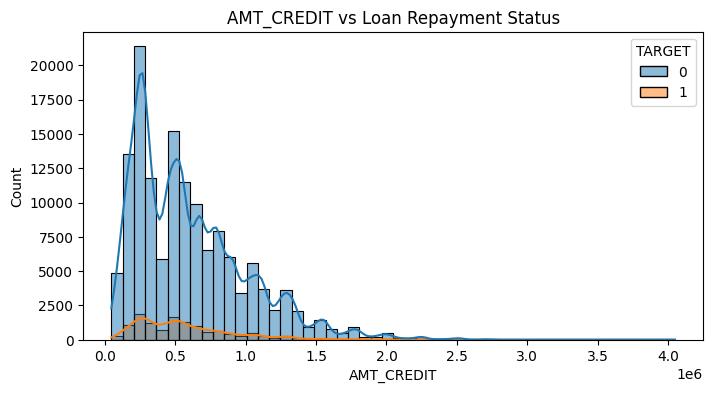

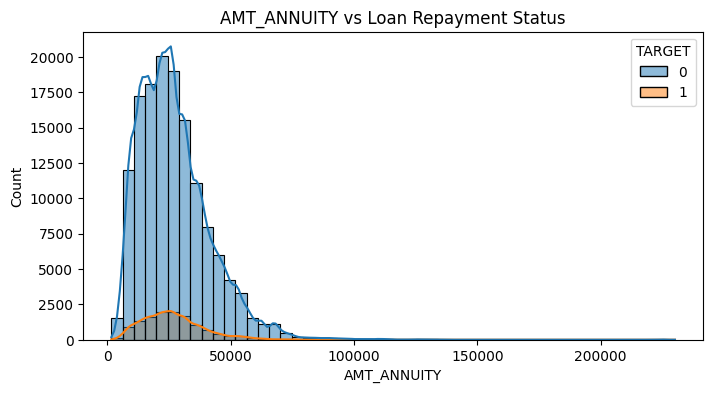

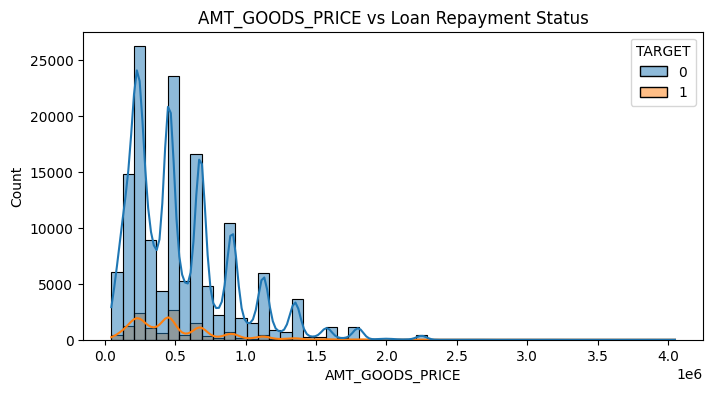

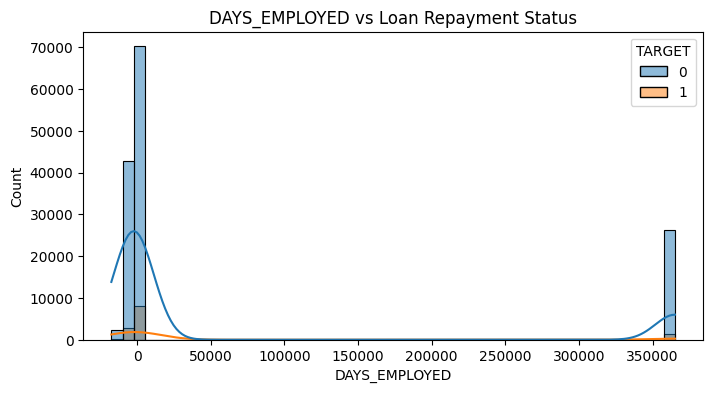

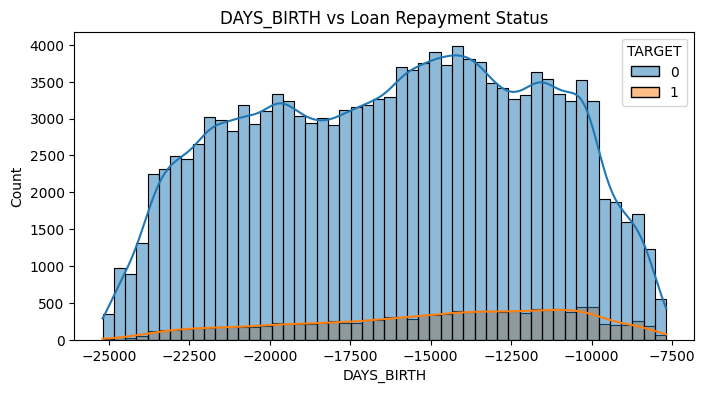

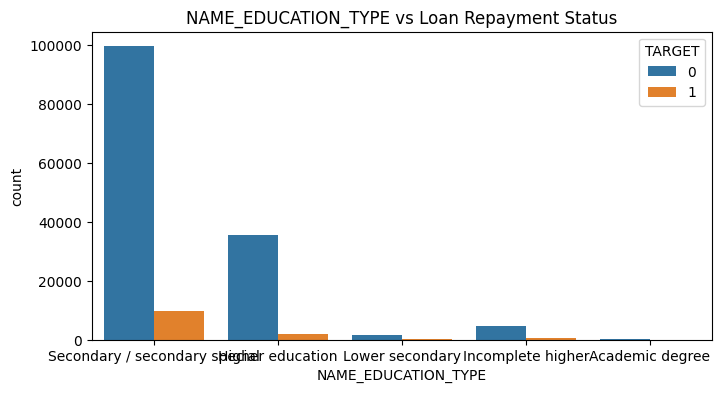

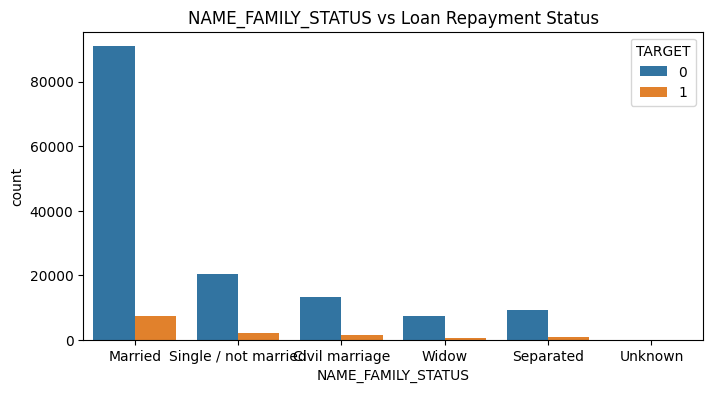

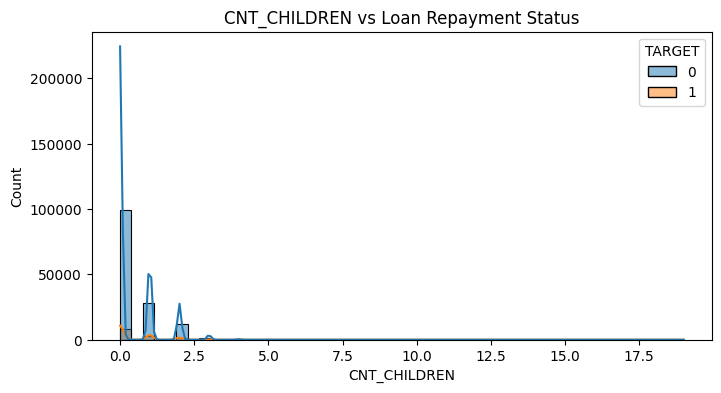

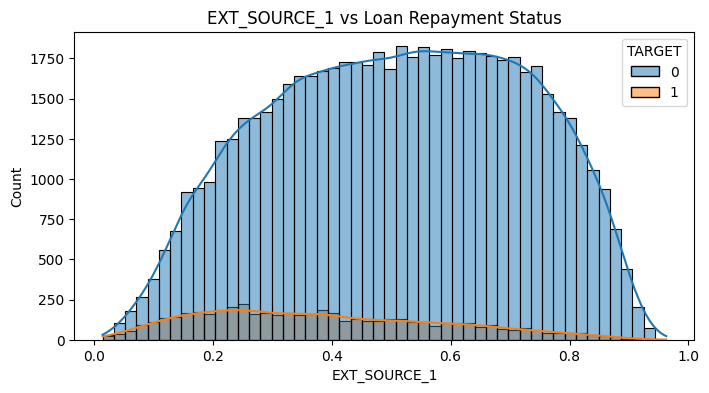

In [6]:
top_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                'DAYS_EMPLOYED', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                'CNT_CHILDREN', 'EXT_SOURCE_1']

for feature in top_features:
    plt.figure(figsize=(8,4))
    if df[feature].dtype == 'object':
        sns.countplot(data=df, x=feature, hue='TARGET')
    else:
        sns.histplot(data=df, x=feature, hue='TARGET', kde=True, bins=50)
    plt.title(f'{feature} vs Loan Repayment Status')
    plt.show()


### Feature Interpretations

**AMT_INCOME_TOTAL**  
This shows the applicant’s total income. I chose it because income is directly related to someone’s ability to repay a loan. The graph showed that most defaulters were in lower income brackets, which supports its relevance to the target variable.

**AMT_CREDIT**  
This is the amount of credit requested. It matters because larger loans can be harder to repay. The plot showed a wide spread, but some clusters of defaults appeared at specific credit levels.

**AMT_ANNUITY**  
This is the monthly payment on the loan. It can be a good indicator of how much strain the loan puts on the borrower. From the graph, there was some overlap between the two classes, but defaults seemed slightly more common among higher annuity amounts.

**AMT_GOODS_PRICE**  
This reflects the cost of the goods the loan is being used for. I included it because it shows spending behavior. There wasn’t a huge difference between groups, but it could still interact meaningfully with other features.

**DAYS_EMPLOYED**  
This is how long someone has been employed. Longer employment usually means more financial stability. The graph showed more defaults among people with shorter employment periods, which supports including this variable.

**DAYS_BIRTH**  
This is the applicant’s age (in negative days). Older applicants tended to default less, so age might be another indirect signal of financial reliability.

**NAME_EDUCATION_TYPE**  
This is a categorical variable for education level. People with higher education might have better job prospects and income. The plot showed slightly higher default rates for those with only secondary education.

**NAME_FAMILY_STATUS**  
This describes the applicant’s family situation. I included it because having dependents or being divorced might affect financial responsibilities. There were some noticeable differences across family statuses in terms of default rates.

**CNT_CHILDREN**  
This is the number of children the applicant has. More children usually means higher expenses. The plot showed that people with more children defaulted more often, though the majority had none or one.

**EXT_SOURCE_1**  
This is an external risk score provided in the dataset. It’s already designed to indicate repayment risk. The lower the score, the more likely a client was to default, confirming that it’s a very useful feature.
